In [103]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [83]:
data = pd.read_csv("SP500.csv", index_col='date', parse_dates=['date'])

In [84]:
data.head()

,open,high,low,close,volume,Name,per_change,Sector
date,,,,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,-0.021234,Industrials
2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,-0.028878,Industrials
2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,-0.012457,Industrials
2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,0.025175,Industrials
2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,-0.063588,Industrials


In [85]:
data.isnull().sum()

open          11
high           8
low            8
close          0
volume         0
Name           0
per_change    11
Sector         0
dtype: int64

In [86]:
np.where(pd.isnull(data))

(array([ 82949,  82949,  82949,  82949, 165734, 165734, 165857, 165857,
        165857, 165857, 205076, 205076, 239832, 239832, 239832, 239832,
        434379, 434379, 434502, 434502, 434502, 434502, 478594, 478594,
        478594, 478594, 558213, 558213, 558213, 558213, 581906, 581906,
        581906, 581906, 598236, 598236, 598236, 598236]),
 array([0, 1, 2, 6, 0, 6, 0, 1, 2, 6, 0, 6, 0, 1, 2, 6, 0, 6, 0, 1, 2, 6,
        0, 1, 2, 6, 0, 1, 2, 6, 0, 1, 2, 6, 0, 1, 2, 6]))

In [87]:
data.iloc[165857:]

,open,high,low,close,volume,Name,per_change,Sector
date,,,,,,,,
2016-01-12,NaN,NaN,NaN,88.55,0,DHR,NaN,Health Care
2016-01-13,89.17,89.2100,86.3900,86.52,2975550,DHR,-0.029719,Health Care
2016-01-14,86.57,87.8000,85.8100,87.31,3080995,DHR,0.008548,Health Care
2016-01-15,85.94,86.4138,85.0700,85.19,4866132,DHR,-0.008727,Health Care
2016-01-19,86.35,86.6100,84.6500,85.61,3358632,DHR,-0.008570,Health Care
2016-01-20,84.46,85.6500,83.5000,85.00,4732303,DHR,0.006394,Health Care
2016-01-21,84.59,85.0700,83.8500,84.43,3847672,DHR,-0.001891,Health Care
2016-01-22,85.55,85.7100,84.7200,85.35,3553566,DHR,-0.002338,Health Care
2016-01-25,85.37,85.6500,84.2400,84.38,3115098,DHR,-0.011597,Health Care


In [88]:
data.dropna(inplace=True)

In [89]:
data.isnull().sum()

open          0
high          0
low           0
close         0
volume        0
Name          0
per_change    0
Sector        0
dtype: int64

In [94]:
apple_close_prices = data[data['Name'] == 'AAPL']['close']

In [96]:
apple_close_prices.head()

date
2013-02-08    67.8542
2013-02-11    68.5614
2013-02-12    66.8428
2013-02-13    66.7156
2013-02-14    66.6556
Name: close, dtype: float64

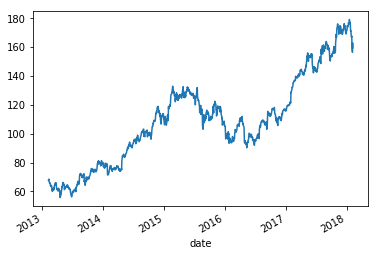

In [99]:
apple_close_prices.plot()

In [101]:
apple_close_20 = apple_close_prices.rolling(window=20).mean()
apple_close_100 = apple_close_prices.rolling(window=100).mean()

Text(0.5,1,'Apple')

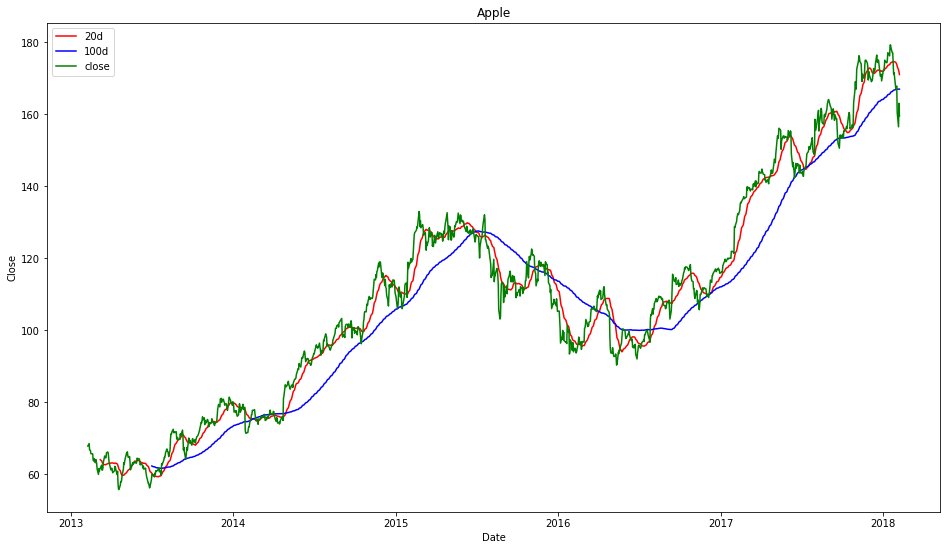

In [120]:
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(apple_close_20.index, apple_close_20, label="20d", color="red")
ax.plot(apple_close_100.index, apple_close_100, label="100d", color="blue")
ax.plot(apple_close_prices.index, apple_close_prices, label="close", color="green")
ax.legend()
ax.set_xlabel("Date")
ax.set_ylabel("Close")
ax.set_title("Apple")